# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/manuscript-v3.2-red?style=for-the-badge)](https://doi.org/10.1103/PhysRevA.107.013528)
[![Toolbox Version](https://img.shields.io/badge/qutip-v4.7.3-red?style=for-the-badge)](https://qutip.org/downloads/4.7.3/qutip-doc-4.7.pdf)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np

# qom modules 
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter

# initialize logger
init_log()

MainThread               INFO    2024-01-30 17:48:38.166: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

(a) Bistability of the qubit along the polarization vector $\langle \sigma_{x} \rangle$.
(b) Fluctuating amplitude oscillation of the mechanical resonator.
(c) Bloch sphere representation of the qubit rotation in the two stable states (blue and red states).
(d) Overlapping limit cycles of the mechanical oscillator corresponding to the two bistable states of the qubit.
The parameters used are ($E_{J}$, $g_{q}$, $\Delta$, $g_{0}$, $A_{lp}$, $A_{lr}$, $\Omega$, $\kappa$, $\gamma$) = ($1.2$, $0.04$, $1.0$, $0.38$, $0.6$, $0.08$, $1.0$, $1.4$, $0.015$) $\times \omega_{m}$.

In [2]:
# number of trajectories
ntraj   = 1
# Hilbert space dimension
N       = 75
# normalized optical drive modulation detuning
Omega   = 1.00
# divisions
t_mul   = 500
# step size
t_ssz   = 1
# time span
ts      = np.linspace(0, 25 * t_mul, 25 * t_ssz * t_mul + 1) / Omega
xs      = ts * Omega

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/qubit_optomech_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, _, _, _, qs, ps, sxs, sys, szs = [arr[i] for i in range(len(arr))]
qs_blue = [qs[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
qs_red = [qs[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]
sxs_blue = [v if v >= 0.0 else np.nan for v in sxs]
sxs_red = [v if v < 0.0 else np.nan for v in sxs]

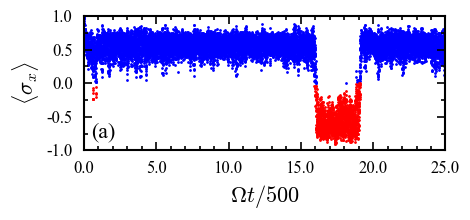

In [3]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\Omega t / {}$'.format(t_mul),
    'x_tick_labels'     : [i * 5.0 for i in range(6)],
    'x_ticks'           : [i * 5.0 * t_mul for i in range(6)],
    'x_ticks_minor'     : [i * t_mul for i in range(26)],
    'v_label'           : '$\\langle \\sigma_{x} \\rangle$',
    'v_ticks'           : [i * 0.5 - 1.0 for i in range(5)],
    'v_ticks_minor'     : [i * 0.25 - 1.0 for i in range(9)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 4.8,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(a)',
        'xy'    : (0.19, 0.36)
    }]
})
plotter.update(
    vs=[sxs_blue, sxs_red],
    xs=xs
)
plotter.show()

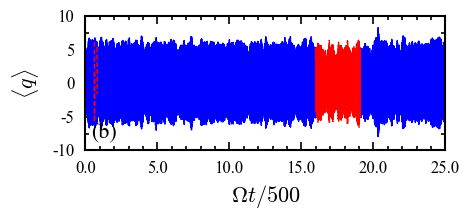

In [4]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'lines',
    'colors'            : ['b', 'r'],
    'x_label'           : '$\\Omega t / {}$'.format(t_mul),
    'x_tick_labels'     : [i * 5.0 for i in range(6)],
    'x_ticks'           : [i * 5.0 * t_mul for i in range(6)],
    'x_ticks_minor'     : [i * t_mul for i in range(26)],
    'v_label'           : '$\\langle q \\rangle$',
    'v_label_pad'       : 8,
    'v_ticks'           : [i * 5 - 10 for i in range(5)],
    'v_ticks_minor'     : [i * 2.5 - 10 for i in range(9)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 4.8,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(b)',
        'xy'    : (0.19, 0.36)
    }]
})
plotter.update(
    vs=[qs_blue, qs_red],
    xs=xs
)
plotter.show()

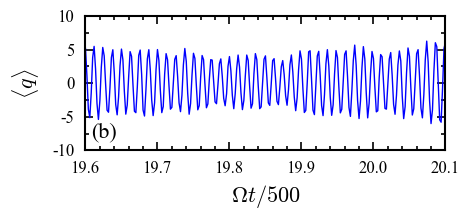

In [5]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'lines',
    'colors'            : ['b', 'r'],
    'x_label'           : '$\\Omega t / {}$'.format(t_mul),
    'x_tick_labels'     : ['{0:2.1f}'.format(i * 0.1 + 19.6) for i in range(6)],
    'x_ticks'           : [i * 0.1 * t_mul + 19.6 * t_mul for i in range(6)],
    'x_ticks_minor'     : [i * 0.02 * t_mul + 19.6 * t_mul for i in range(26)],
    'v_label'           : '$\\langle q \\rangle$',
    'v_label_pad'       : 8,
    'v_ticks'           : [i * 5 - 10 for i in range(5)],
    'v_ticks_minor'     : [i * 2.5 - 10 for i in range(9)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 4.8,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(b)',
        'xy'    : (0.19, 0.36)
    }]
})
plotter.update(
    vs=[qs_blue, qs_red],
    xs=xs
)
plotter.show()

## Figure 3

(a) Two well-separated and distinct limit cycles of the mechanical oscillator when it is directly driven.
In the absence of the optical cavity, the mechanical-qubit system shows less fluctuation.
(b) Rotation in the qubit basis.
The parameters used are same as those in Figure 2.

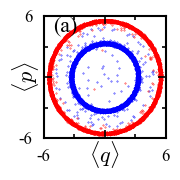

In [6]:
# coupling strength
g           = 0.04
# normalized time-dependent coefficient lambda
lamb_norm   = 0.02
# number of oscillator states
n_p         = 20
# normalized qubit energy spacing
Omega_norm  = 1.2
# number of trajectories
ntraj       = 1
# Hilbert space dimension
N           = 70
# normalized drive frequency
Omega       = 1.01
# divisor
t_mul       = 1000
# step size
t_ssz       = 100

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/physrevlett_100_014101_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, qs, ps, sxs, _, _ = [arr[i][10:] for i in range(len(arr))]
ps_blue = [ps[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
ps_red = [ps[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]

# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\langle q \\rangle$',
    'x_label_pad'       : -19,
    'x_tick_labels'     : [-6, '', 6],
    'x_ticks'           : [-6, 0, 6],
    'x_ticks_minor'     : [i * 3 - 6 for i in range(5)],
    'v_label'           : '$\\langle p \\rangle$',
    'v_label_pad'       : -16,
    'v_tick_labels'     : [-6, '', 6],
    'v_ticks'           : [-6, 0, 6],
    'v_ticks_minor'     : [i * 3 - 6 for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 1.9,
    'height'            : 1.9,
    'annotations'       : [{
        'text'  : '(a)',
        'xy'    : (0.28, 0.78)
    }]
})
plotter.update(
    vs=[ps_blue, ps_red],
    xs=qs
)
plotter.show()

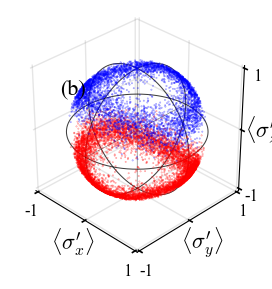

In [7]:
# number of trajectories
ntraj   = 1
# Hilbert space dimension
N       = 75
# normalized optical drive modulation detuning
Omega   = 1.00
# divisions
t_mul   = 500
# step size
t_ssz   = 1

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/qubit_optomech_basis_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, _, _, _, _, _, sxs, sys, szs = [arr[i][t_mul:] for i in range(len(arr))]
vs = [0 if szs[i] >= 0.0 else 1 for i in range(len(sxs))]

# plot
plotter = MPLPlotter(
    axes={
        'X' : sxs,
        'Y' : sys,
        'Z' : szs
    }, params={
        'type'              : 'density_unit',
        'palette'           : ['b', 'r'],
        'sizes'             : [0.1, 0.1],
        'styles'            : ['o', 'o'],
        'x_label'           : '$\\langle \\sigma_{x}^{\prime} \\rangle$',
        'x_label_pad'       : -10,
        'x_tick_labels'     : [-1, '', 1],
        'x_tick_pad'        : -2,
        'x_ticks'           : [-1, 0, 1],
        'y_label'           : '$\\langle \\sigma_{y}^{\prime} \\rangle$',
        'y_label_pad'       : -10,
        'y_tick_labels'     : [-1, '', 1],
        'y_tick_pad'        : -2,
        'y_ticks'           : [-1, 0, 1],
        'z_label'           : '$\\langle \\sigma_{z}^{\prime} \\rangle$',
        'z_label_pad'       : -10,
        'z_tick_labels'     : [-1, '', 1],
        'z_tick_pad'        : -2,
        'z_ticks'           : [-1, 0, 1],
        'label_font_size'   : 16,
        'tick_font_size'    : 12,
        'width'             : 3.0,
        'height'            : 3.0,
        'view_aspect'       : [1.0, 1.0, 1.0],
        'view_elevation'    : 32,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.2, 0.65)
        }]
    }
)
plotter.update(
    vs=vs,
    xs=sxs,
    ys=sys,
    zs=szs
)
plotter.show()

## Figure 4

Synchronization of the hybrid system.
(a) Qubit phase ($\phi$) versus mechanical phase ($\psi$) plot.
(b) Qubit phase ($\theta$) versus mechanical phase ($\psi$) plot.
Phase synchronization of the two stable qubit states with the two limit cycles of the mechanical oscillator indicated by red and blue is clearly seen in (a) and (b).
Synchronization of the qubit blue state with the external optical drive is shown in (c).
Similarly, phase plot of the mechanical oscillator in the blue limit cycle and the external drive is plotted in (d).
(e) Unsynchronization phase plot of the qubit red state versus the external drive.
(d) Phase of the red limit cycle versus phase of the external drive phase.
The parameters used are same as those in Figure 2.

In [8]:
# number of trajectories
ntraj   = 1
# Hilbert space dimension
N       = 75
# normalized optical drive modulation detuning
Omega   = 1.00
# divisions
t_mul   = 500
# step size
t_ssz   = 1
# time span
ts      = np.linspace(0, 25 * t_mul, 25 * t_ssz * t_mul + 1) / Omega
xs      = (ts[t_mul:] * Omega) % (2 * np.pi) - np.pi

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/qubit_optomech_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, _, _, _, qs, ps, sxs, sys, szs = [arr[i][t_mul:] for i in range(len(arr))]
phis = np.array([np.arctan2(sys[i], szs[i]) for i in range(len(sxs))])
psis = np.array([np.arctan2(-ps[i], qs[i]) for i in range(len(sxs))])
thetas = np.array([np.arctan2(sys[i] / np.sin(phis[i]), sxs[i]) for i in range(len(sxs))])
phis_blue = [phis[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
phis_red = [phis[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]
psis_blue = [psis[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
psis_red = [psis[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]
thetas_blue = [thetas[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
thetas_red = [thetas[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]

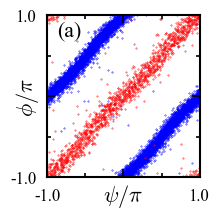

In [9]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\psi / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\phi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(a)',
        'xy'    : (0.25, 0.8)
    }]
})
plotter.update(
    vs=[phis_blue, phis_red],
    xs=psis
)
plotter.show()

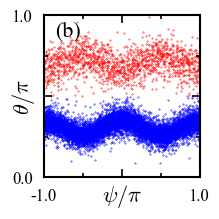

In [10]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\psi / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\theta / \\pi$',
    'v_label_pad'       : -18,
    'v_tick_labels'     : [0.0, '', 1.0],
    'v_ticks'           : [0.0, np.pi / 2, np.pi],
    'v_ticks_minor'     : [i * 0.25 * np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(b)',
        'xy'    : (0.24, 0.8)
    }]
})
plotter.update(
    vs=[thetas_blue, thetas_red],
    xs=psis
)
plotter.show()

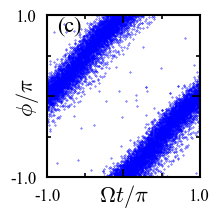

In [11]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b'],
    'sizes'             : [0.1],
    'styles'            : ['o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\phi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(c)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=phis_blue,
    xs=xs
)
plotter.show()

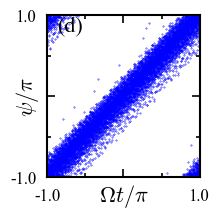

In [12]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b'],
    'sizes'             : [0.1],
    'styles'            : ['o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\psi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(d)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=psis_blue,
    xs=xs
)
plotter.show()

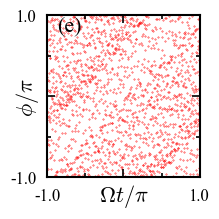

In [13]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['r'],
    'sizes'             : [0.1],
    'styles'            : ['o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\phi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(e)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=phis_red,
    xs=xs
)
plotter.show()

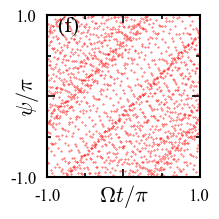

In [14]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['r'],
    'sizes'             : [0.1],
    'styles'            : ['o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\psi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(f)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=psis_red,
    xs=xs
)
plotter.show()

## Figure 5

Results for a large number of trajectories run.
(a) Time evolution of qubit vector $\langle \sigma_{x} \rangle$.
We no longer observe bistability.
The qubit vector decays to a near zero state.
Panels (b), (c) show the less fluctuating synchronization of the qubit and the mechanical oscillator
with the reference field, respectively.
The parameters used are same as those in Figure 2.
(d) Phase plot of the mechanical oscillator and the drive field in a pure optomechanical system.
In this case also we observe less fluctuations due to the large number of trajectories.

In [15]:
# number of trajectories
ntraj   = 1000
# Hilbert space dimension
N       = 30
# normalized optical drive modulation detuning
Omega   = 1.00
# divisions
t_mul   = 500
# step size
t_ssz   = 1
# time span
ts      = np.linspace(0, 25 * t_mul, 25 * t_ssz * t_mul + 1) / Omega
xs      = ts[1:] * Omega

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/qubit_optomech_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, _, _, _, qs, ps, sxs, sys, szs = [arr[i][1:] for i in range(len(arr))]
phis = np.array([np.arctan2(sys[i], szs[i]) for i in range(len(sxs))])
psis = np.array([np.arctan2(-ps[i], qs[i]) for i in range(len(sxs))])
phis_blue = [phis[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
phis_red = [phis[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]
psis_blue = [psis[i] if sxs[i] >= 0.0 else np.nan for i in range(len(sxs))]
psis_red = [psis[i] if sxs[i] < 0.0 else np.nan for i in range(len(sxs))]
sxs_blue = [v if v >= 0.0 else np.nan for v in sxs]
sxs_red = [v if v < 0.0 else np.nan for v in sxs]

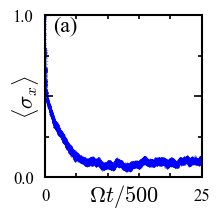

In [16]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\Omega t / {}$'.format(t_mul),
    'x_label_pad'       : -16,
    'x_tick_labels'     : [0, 25],
    'x_ticks'           : [0, 25 * t_mul],
    'x_ticks_minor'     : [i * 5.0 * t_mul for i in range(6)],
    'v_label'           : '$\\langle \\sigma_{x} \\rangle$',
    'v_label_pad'       : -20,
    'v_tick_labels'     : [0.0, '', 1.0],
    'v_ticks'           : [i * 0.5 for i in range(3)],
    'v_ticks_minor'     : [i * 0.25 for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(a)',
        'xy'    : (0.23, 0.82)
    }]
})
plotter.update(
    vs=[sxs_blue, sxs_red],
    xs=xs
)
plotter.show()

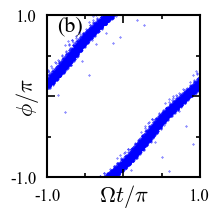

In [17]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\phi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(b)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=[phis_blue, phis_red],
    xs=xs % (2 * np.pi) - np.pi
)
plotter.show()

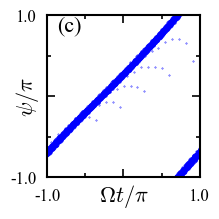

In [18]:
# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\psi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(c)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=[psis_blue, psis_red],
    xs=xs % (2 * np.pi) - np.pi
)
plotter.show()

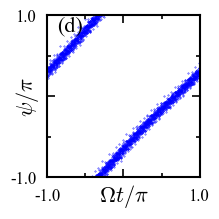

In [19]:
# number of trajectories
ntraj   = 400
# Hilbert space dimension
N       = 30
# normalized optical drive modulation detuning
Omega   = 0.98
# divisions
t_mul   = 100
# step size
t_ssz   = 1
# time span
ts      = np.linspace(0, 25 * t_mul, 25 * t_ssz * t_mul + 1) / Omega
xs      = (ts[2 * t_mul:] * Omega) % (2 * np.pi) - np.pi

# extract values
arr = np.load('../../data/v3.2_qutip-v4.7.3/optomech_ntraj={}_N={}_Omega={}_t_mul={}_t_ssz={}_irr.npz'.format(ntraj, N, Omega, t_mul, t_ssz))['arr_0']
_, _, _, _, qs, ps = [arr[i][2 * t_mul:] for i in range(len(arr))]
psis = np.array([np.arctan2(-ps[i], qs[i]) for i in range(len(qs))])

# plot
plotter = MPLPlotter(axes={}, params={
    'type'              : 'scatters',
    'colors'            : ['b', 'r'],
    'sizes'             : [0.1, 0.1],
    'styles'            : ['o', 'o'],
    'x_label'           : '$\\Omega t / \\pi$',
    'x_label_pad'       : -16,
    'x_tick_labels'     : [-1.0, '', 1.0],
    'x_ticks'           : [-np.pi, 0.0, np.pi],
    'x_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'v_label'           : '$\\psi / \\pi$',
    'v_label_pad'       : -22,
    'v_tick_labels'     : [-1.0, '', 1.0],
    'v_ticks'           : [-np.pi, 0.0, np.pi],
    'v_ticks_minor'     : [i * 0.5 * np.pi - np.pi for i in range(5)],
    'label_font_size'   : 16,
    'tick_font_size'    : 12,
    'width'             : 2.3,
    'height'            : 2.3,
    'annotations'       : [{
        'text'  : '(d)',
        'xy'    : (0.25, 0.82)
    }]
})
plotter.update(
    vs=psis,
    xs=xs
)
plotter.show()